# PCP case study
## No chl prime

### Notebook helper function for pretty output

In [1]:
from IPython.display import Markdown, display


def print_md(markdown_printable):
    """Pretty render Markdown."""
    display(Markdown(str(markdown_printable)))


def print_yaml_file(file_path):
    """Pretty render yaml file."""
    with open(file_path) as f:
        print_md(f"```yaml\n{f.read()}\n```")

### Plotting functions ([`pyglotaran_extras`](https://github.com/s-weigand/pyglotaran-extras/commit/20da3593105fb839f86e668dc12dc9ca87c3b9ce) + `matplotlib`)

In [2]:
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_svd import plot_svd
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### Analysis functions

In [3]:
from glotaran.analysis.optimize import optimize
from glotaran.io import load_dataset, load_model, load_parameters
from glotaran.project.scheme import Scheme

### Read data

In [4]:
dataset = load_dataset("PCP490.ascii")
dataset

<xarray.Dataset>
Dimensions:                      (left_singular_value_index: 127, right_singular_value_index: 127, singular_value_index: 127, spectral: 127, time: 198)
Coordinates:
  * time                         (time) float64 -0.825 -0.725 ... 76.7 78.7
  * spectral                     (spectral) float64 473.2 475.3 ... 743.2 745.3
Dimensions without coordinates: left_singular_value_index, right_singular_value_index, singular_value_index
Data variables:
    data                         (time, spectral) float64 0.0002336 ... 0.000...
    data_left_singular_vectors   (time, left_singular_value_index) float64 -0...
    data_singular_values         (singular_value_index) float64 0.7069 ... 0....
    data_right_singular_vectors  (right_singular_value_index, spectral) float64 ...

### Load model and parameters

In [5]:
PCP_model = load_model("models/PCP-model.yml")
PCP_parameters = load_parameters("models/PCP-parameters.yml")
print_md(PCP_model.validate(parameters=PCP_parameters))

Your model is valid.

In [6]:
print_md(PCP_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5']
  * *Parameters*: [input.1, input.0, input.0, input.0, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.9
    * *('s2', 's1')*: kinetic.1
    * *('s5', 's1')*: kinetic.2
    * *('s2', 's2')*: kinetic.9
    * *('s3', 's2')*: kinetic.3
    * *('s4', 's2')*: kinetic.4
    * *('s5', 's2')*: kinetic.8
    * *('s3', 's3')*: kinetic.9
    * *('s5', 's3')*: kinetic.5
    * *('s4', 's4')*: kinetic.9
    * *('s5', 's4')*: kinetic.6
    * *('s5', 's5')*: kinetic.7
  

## Irf

* **irf1** (gaussian):
  * *Label*: irf1
  * *Type*: gaussian
  * *Center*: irf.center
  * *Width*: irf.width
  * *Normalize*: True
  * *Backsweep*: False

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']



### Create scheme and optimize it

In [7]:
PCP_scheme = Scheme(PCP_model, PCP_parameters, {"dataset1": dataset})
PCP_result = optimize(PCP_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0573e-03                                    3.59e-02    
       1              2         1.6894e-03      3.68e-04       1.57e-02       4.09e-03    
       2              3         1.6751e-03      1.43e-05       6.39e-03       8.70e-04    
       3              4         1.6739e-03      1.20e-06       1.99e-03       2.53e-04    
       4              5         1.6738e-03      9.04e-08       5.46e-04       6.89e-05    
       5              6         1.6738e-03      6.70e-09       1.49e-04       1.87e-05    
       6              7         1.6738e-03      4.94e-10       4.04e-05       5.08e-06    
       7              8         1.6738e-03      3.64e-11       1.10e-05       1.38e-06    
       8              9         1.6738e-03      2.68e-12       2.98e-06       3.74e-07    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 2.0573e-03

In [8]:
PCP_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 5, component: 5, from_species: 5, left_singular_value_index: 127, right_singular_value_index: 127, singular_value_index: 127, species: 5, spectral: 127, time: 198, to_species: 5)
Coordinates:
  * time                                      (time) float64 -0.825 ... 78.7
  * spectral                                  (spectral) float64 473.2 ... 745.3
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's5'
  * species                                   (species) <U2 's1' 's2' ... 's5'
    rate                                      (component) float64 -15.14 ... ...
    lifetime                                  (component) float64 -0.06605 .....
  * to_species                                (to_species) <U2 's1' ... 's5'
  * from_species                              (from_species) <U2 's1' ... 's5'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/24)
    data                                      (time, spectral) float64 0.0002...
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    matrix                                    (time, clp_label) float64 1.727...
    clp                                       (spectral, clp_label) float64 -...
    ...                                        ...
    a_matrix                                  (component, species) float64 1....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 0.009454
    irf_width                                 float64 0.06646
    irf                                       (time) float64 5.903e-35 ... 0.0
Attributes:
    root_mean_square_error:           0.0003648636062958407
    weighted_root_mean_square_error:  0.0003648636062958407

### Result plots

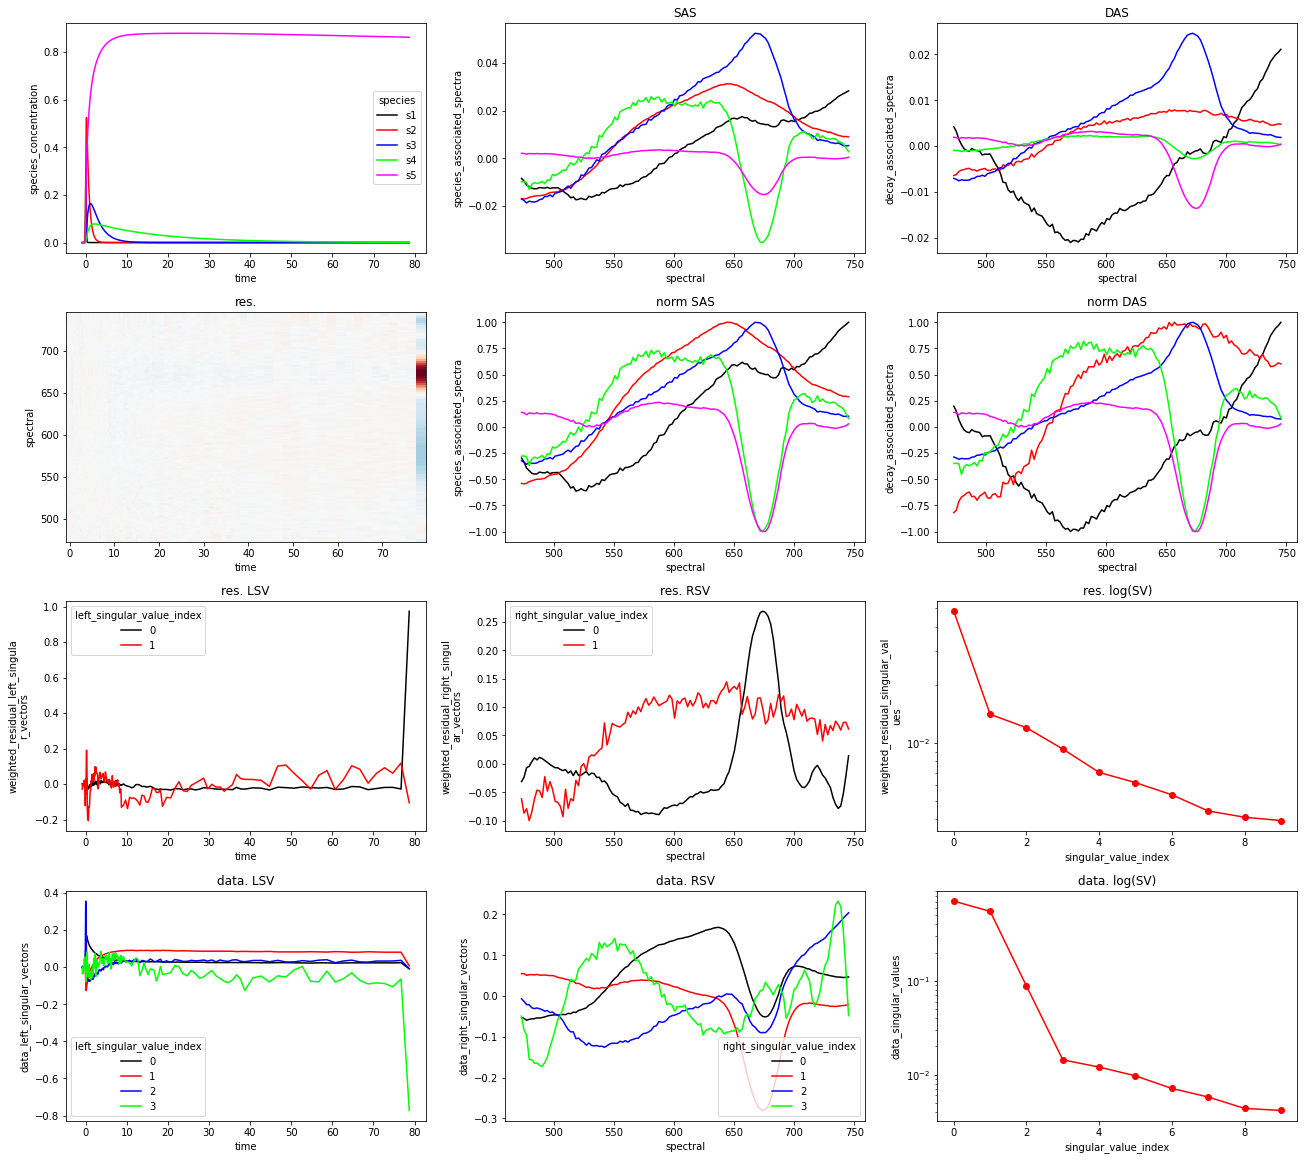

In [9]:
try:
    fig = plot_overview(PCP_result.data["dataset1"], linlog=False)
except ValueError:
    # residual data aren't sorted and the plot fails
    pass

In [10]:
print_md(PCP_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |    _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|------------|---------|---------|----------|------------------|----------|
    | center    | 0.00945429 |   1.31207  |    -inf |     inf | True     | False            | None     |
    | width     | 0.0664634  |   0.940958 |    -inf |     inf | True     | False            | None     |

  * __kinetic__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |   11      |          0 |    -inf |     inf | False    | False            | None     |
    |         2 |    4.1    |          0 |    -inf |     inf | False    | False            | None     |
    |         3 |    0.6    |          0 |    -inf |     inf | False    | False            | None     |
    |         4 |    0.2    |          0 |    -inf |     inf | False    | False            | None     |
    |         5 |    0.4    |          0 |    -inf |     inf | False    | False            | None     |
    |         6 |    0.02   |          0 |    -inf |     inf | False    | False            | None     |
    |         7 |    0.0005 |          0 |    -inf |     inf | False    | False            | None     |
    |         8 |    0.8    |          0 |    -inf |     inf | False    | False            | None     |
    |         9 |    0.04   |          0 |    -inf |     inf | False    | False            | None     |



## chl prime

### Load model and parameters

In [11]:
PCP_chl_prime_model = load_model("models/PCP-chl-prime-model.yml")
PCP_chl_prime_parameters = load_parameters("models/PCP-chl-prime-parameters.yml")
print_md(PCP_model.validate(parameters=PCP_chl_prime_parameters))

Your model is valid.

In [12]:
print_md(PCP_chl_prime_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5', 's6']
  * *Parameters*: [input.1, input.0, input.0, input.0, input.0, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.9
    * *('s2', 's1')*: kinetic.1
    * *('s5', 's1')*: kinetic.11
    * *('s6', 's1')*: kinetic.15
    * *('s2', 's2')*: kinetic.9
    * *('s3', 's2')*: kinetic.3
    * *('s4', 's2')*: kinetic.4
    * *('s5', 's2')*: kinetic.12
    * *('s6', 's2')*: kinetic.16
    * *('s3', 's3')*: kinetic.9
    * *('s5', 's3')*: kinetic.13
    * *('s6', 's3')*: kinetic.17
    * *('s4', 's4')*: kinetic.9
    * *('s5', 's4')*: kinetic.14
    * *('s6', 's4')*: kinetic.18
    * *('s5', 's5')*: kinetic.7
    * *('s6', 's6')*: kinetic.10
  

## Irf

* **irf1** (gaussian):
  * *Label*: irf1
  * *Type*: gaussian
  * *Center*: irf.center
  * *Width*: irf.width
  * *Normalize*: True
  * *Backsweep*: False

## Dataset

* **dataset1**:
  * *Label*: dataset1
  * *Megacomplex*: ['mc1']
  * *Initial Concentration*: input1
  * *Irf*: irf1

## Megacomplex

* **mc1**:
  * *Label*: mc1
  * *K Matrix*: ['km1']

## Spectral Relations

* 
  * *Compartment*: s5
  * *Target*: s6
  * *Parameter*: rel.r1
  * *Interval*: [[0, 1000]]



### Create sceme and optimize it

In [13]:
PCP_chl_prime_scheme = Scheme(
    PCP_chl_prime_model, PCP_chl_prime_parameters, {"dataset1": dataset}
)
PCP_chl_prime_result = optimize(PCP_chl_prime_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.0130e-03                                    3.57e-02    
       1              2         1.6626e-03      3.50e-04       1.51e-02       3.80e-03    
       2              3         1.6506e-03      1.20e-05       5.63e-03       8.92e-04    
       3              4         1.6493e-03      1.23e-06       1.93e-03       2.92e-04    
       4              5         1.6492e-03      1.17e-07       5.95e-04       8.98e-05    
       5              6         1.6492e-03      1.10e-08       1.82e-04       2.75e-05    
       6              7         1.6492e-03      1.03e-09       5.58e-05       8.41e-06    
       7              8         1.6492e-03      9.62e-11       1.71e-05       2.57e-06    
       8              9         1.6492e-03      8.99e-12       5.22e-06       7.86e-07    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 2.0130e-03

In [14]:
PCP_chl_prime_result.data["dataset1"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 6, component: 6, from_species: 6, left_singular_value_index: 127, right_singular_value_index: 127, singular_value_index: 127, species: 6, spectral: 127, time: 198, to_species: 6)
Coordinates:
  * time                                      (time) float64 -0.825 ... 78.7
  * spectral                                  (spectral) float64 473.2 ... 745.3
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's6'
  * species                                   (species) <U2 's1' 's2' ... 's6'
    rate                                      (component) float64 -15.14 ... ...
    lifetime                                  (component) float64 -0.06605 .....
  * to_species                                (to_species) <U2 's1' ... 's6'
  * from_species                              (from_species) <U2 's1' ... 's6'
Dimensions without coordinates: component, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/24)
    data                                      (time, spectral) float64 0.0002...
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    matrix                                    (spectral, time, clp_label) float64 ...
    clp                                       (spectral, clp_label) float64 -...
    ...                                        ...
    a_matrix                                  (component, species) float64 1....
    k_matrix                                  (to_species, from_species) float64 ...
    k_matrix_reduced                          (to_species, from_species) float64 ...
    irf_center                                float64 0.01118
    irf_width                                 float64 0.06693
    irf                                       (time) float64 1.275e-34 ... 0.0
Attributes:
    root_mean_square_error:           0.0003621751818570837
    weighted_root_mean_square_error:  0.0003621751818570837

### Result plots

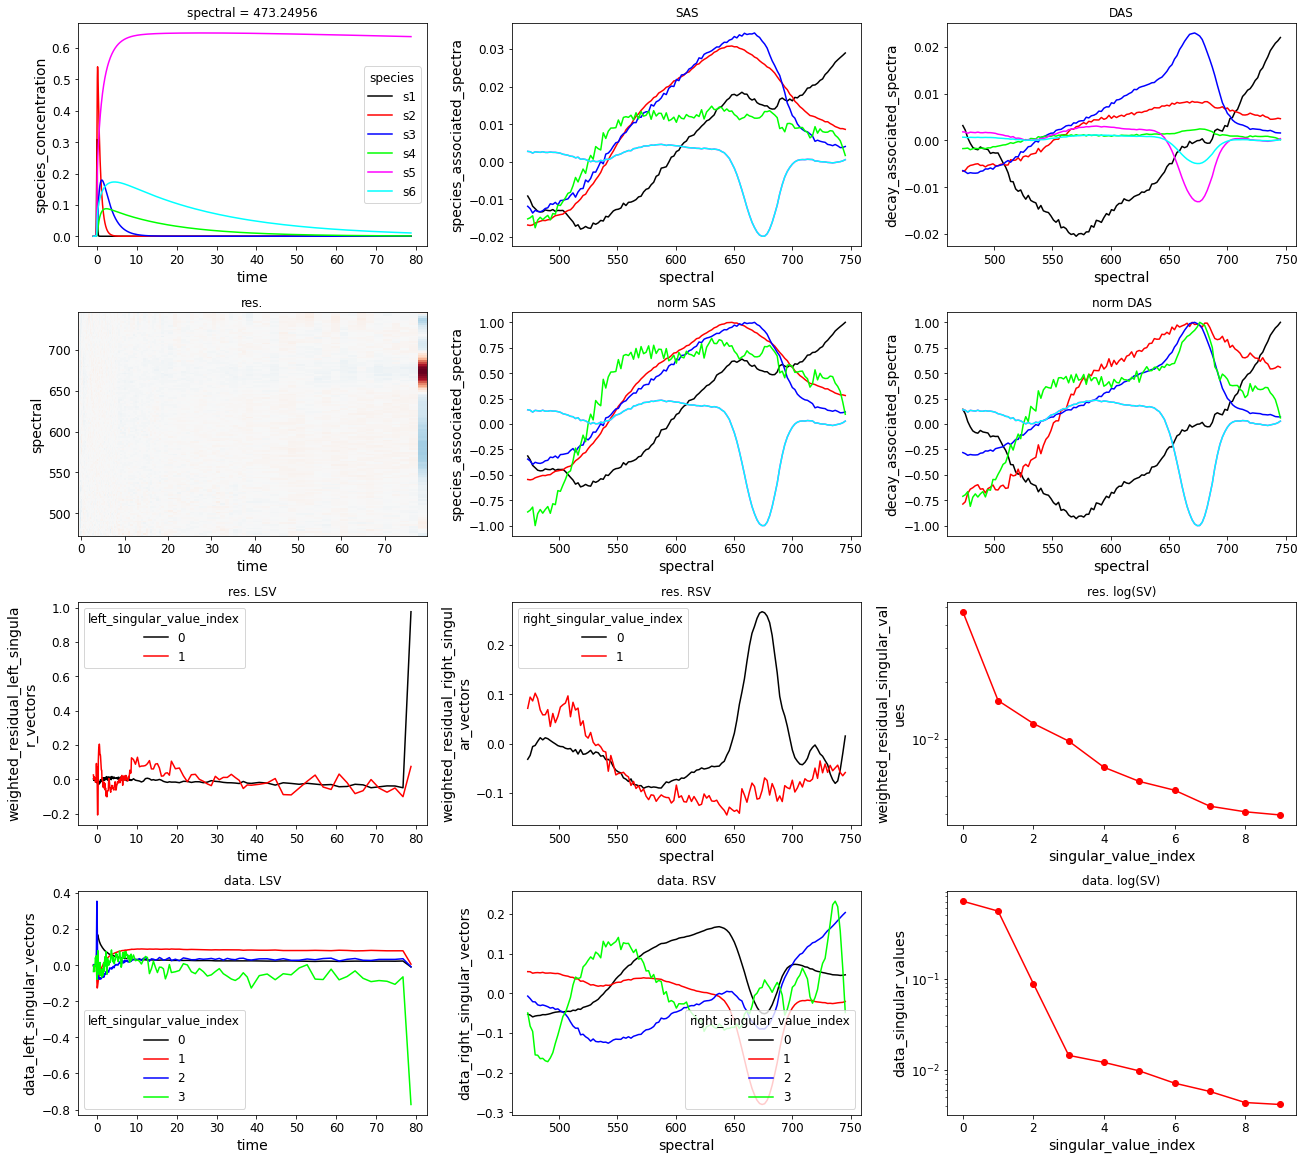

In [15]:
try:
    fig = plot_overview(PCP_chl_prime_result.data["dataset1"], linlog=False)
except ValueError:
    # residual data aren't sorted and the plot fails
    pass

In [16]:
print_md(PCP_chl_prime_result.optimized_parameters)

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | center    | 0.0111839 |   1.26513  |    -inf |     inf | True     | False            | None     |
    | width     | 0.0669291 |   0.931301 |    -inf |     inf | True     | False            | None     |

  * __kinetic__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_                  |
    |-----------|-----------|------------|---------|---------|----------|------------------|-------------------------|
    |         1 |   11      |          0 |    -inf |     inf | False    | False            | None                    |
    |         2 |    4.1    |          0 |    -inf |     inf | False    | False            | None                    |
    |         3 |    0.6    |          0 |    -inf |     inf | False    | False            | None                    |
    |         4 |    0.2    |          0 |    -inf |     inf | False    | False            | None                    |
    |         5 |    0.4    |          0 |    -inf |     inf | False    | False            | None                    |
    |         6 |    0.02   |          0 |    -inf |     inf | False    | False            | None                    |
    |         7 |    0.0005 |          0 |    -inf |     inf | False    | False            | None                    |
    |         8 |    0.6    |          0 |    -inf |     inf | False    | False            | None                    |
    |         9 |    0.04   |          0 |    -inf |     inf | False    | False            | None                    |
    |        10 |    0.04   |          0 |    -inf |     inf | False    | False            | None                    |
    |        11 |    3.075  |          0 |    -inf |     inf | False    | False            | $kinetic.2 * $scaling.1 |
    |        12 |    0.45   |          0 |    -inf |     inf | False    | False            | $kinetic.8 * $scaling.1 |
    |        13 |    0.3    |          0 |    -inf |     inf | False    | False            | $kinetic.5 * $scaling.1 |
    |        14 |    0.015  |          0 |    -inf |     inf | False    | False            | $kinetic.6 * $scaling.1 |
    |        15 |    1.025  |          0 |    -inf |     inf | False    | False            | $kinetic.2 * $scaling.2 |
    |        16 |    0.15   |          0 |    -inf |     inf | False    | False            | $kinetic.8 * $scaling.2 |
    |        17 |    0.1    |          0 |    -inf |     inf | False    | False            | $kinetic.5 * $scaling.2 |
    |        18 |    0.005  |          0 |    -inf |     inf | False    | False            | $kinetic.6 * $scaling.2 |

  * __rel__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | r1        |         1 |          0 |    -inf |     inf | False    | False            | None     |

  * __scaling__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |      0.75 |          0 |    -inf |     inf | False    | False            | None     |
    |         2 |      0.25 |          0 |    -inf |     inf | False    | False            | None     |

